# Chapter 4: Dipping Toes in Deep Learning

## Convolution Neural Networks

Convolution neural networks (CNNs) have gained unparalleled popularity in computer vision tasks. A convolution neural network consists of several important components, such as,

* Convolution layers
* Pooling layers
* Dense layers (for final prediction)

In this chapter, we will use CNNs to learn the Cifar10 dataset. Like MNIST, Cifar10 is another popular dataset in computer vision. But it is a much more interesting dataset as you will see. Specifically, you will learn the following.

* How to do simple data exploration
* How to define a CNN model
* How to format data to suit model training
* How to train a model

<table align="left">
    <td>
        <a target="_blank" href="https://colab.research.google.com/github/thushv89/manning_tf2_in_action/blob/master/Ch04-Deep-Networks-with-Keras/4.2.Convolution_networks.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
    </td>
</table>

## Importing necessary libraries

In [1]:
import random
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
%matplotlib inline

def fix_random_seed(seed):
    """ Setting the random seed of various libraries """
    try:
        np.random.seed(seed)
    except NameError:
        print("Warning: Numpy is not imported. Setting the seed for Numpy failed.")
    try:
        tf.random.set_seed(seed)
    except NameError:
        print("Warning: TensorFlow is not imported. Setting the seed for TensorFlow failed.")
    try:
        random.seed(seed)
    except NameError:
        print("Warning: random module is not imported. Setting the seed for random failed.")

# Fixing the random seed
fix_random_seed(4321)
print("TensorFlow version: {}".format(tf.__version__))

TensorFlow version: 2.9.0


## Loading and Exploring the data

Here we will load the dataset using the `tensorflow-datasets` library. Next, we will print the very first item in the dataset and see what we have. You will see that image data varies between [0,255]. Finally, we will plot some of the images to understand the classes and images we have to work with. We will not explore this too much as we have already worked with this dataset briefly in Chapter 2.

In [2]:
# Section 4.2

import tensorflow_datasets as tfds
# Loading the CIFAR10 dataset
data = tfds.load('cifar10')

2022-07-29 18:50:03.922391: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

2022-07-29 18:50:08.667501: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-29 18:50:08.676406: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-29 18:50:08.676923: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-29 18:50:08.677721: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Shuffling ~/tensorflow_datasets/cifar10/3.0.2.incompleteQD0ELX/cifar10-train.tfrecord*...:   0%|          | 0/…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar10/3.0.2.incompleteQD0ELX/cifar10-test.tfrecord*...:   0%|          | 0/1…

Dataset cifar10 downloaded and prepared to ~/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [3]:
print(data)

{Split('train'): <PrefetchDataset element_spec={'id': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>, Split('test'): <PrefetchDataset element_spec={'id': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}


In [4]:
# Section 4.2

# Let's see the first element in the training set
for i in data["train"].take(1):
    print(i)

{'id': <tf.Tensor: shape=(), dtype=string, numpy=b'train_16399'>, 'image': <tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[143,  96,  70],
        [141,  96,  72],
        [135,  93,  72],
        ...,
        [ 96,  37,  19],
        [105,  42,  18],
        [104,  38,  20]],

       [[128,  98,  92],
        [146, 118, 112],
        [170, 145, 138],
        ...,
        [108,  45,  26],
        [112,  44,  24],
        [112,  41,  22]],

       [[ 93,  69,  75],
        [118,  96, 101],
        [179, 160, 162],
        ...,
        [128,  68,  47],
        [125,  61,  42],
        [122,  59,  39]],

       ...,

       [[187, 150, 123],
        [184, 148, 123],
        [179, 142, 121],
        ...,
        [198, 163, 132],
        [201, 166, 135],
        [207, 174, 143]],

       [[187, 150, 117],
        [181, 143, 115],
        [175, 136, 113],
        ...,
        [201, 164, 132],
        [205, 168, 135],
        [207, 171, 139]],

       [[195, 161, 126],
        [18

2022-07-29 18:50:37.998199: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


## Plotting the data

Let's plot some data along with the image categories for those images.

2022-07-29 18:50:38.040267: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


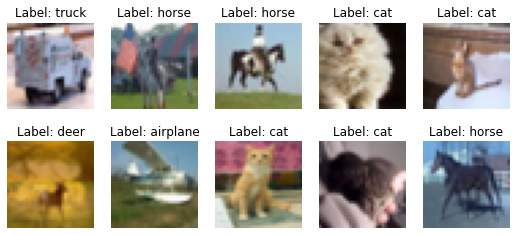

In [5]:
# Section 4.2

import matplotlib.pyplot as plt
%matplotlib inline

# Take 10 samples randomly to plot
sample_images, sample_labels = [],[]
for d in data["train"].shuffle(100, seed=4321).take(10):
    sample_images.append(d["image"].numpy())
    sample_labels.append(d["label"].numpy())

# Creating a label map mapping the integer label to the string
label_map = dict(zip(
    list(range(10)),
    ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]))

# Plotting the images
f, axes = plt.subplots(2, 5, figsize=(9,4))
for i, (img, lbl) in enumerate(zip(sample_images, sample_labels)):
    r, c = i//5, i%5
    axes[r,c].imshow(img,cmap='gray')
    axes[r,c].axis('off')
    axes[r,c].set_title("Label: {}".format(label_map[lbl]))

## Defining the model

Let's define a CNN model. But wait, we are getting an error trying to run this model. This is because, one needs to be careful of the output sizes of the model's each layer. In this case, the model we created has led to an invalid height and width dimensions **causing an error**.

In [6]:
# Section 4.2
# Code listing 4.2

from tensorflow.keras import layers, models
import tensorflow.keras.backend as K

K.clear_session()

# Defining the CNN model
cnn = models.Sequential(
    [layers.Conv2D(filters=16,kernel_size=(9,9), strides=(2,2), activation='relu', input_shape=(32,32,3)), # 32->12
     layers.Conv2D(32, (7,7), activation='relu'), # 12 -> 6
     layers.Conv2D(64, (7,7), activation='relu'), # 6 -> -1
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')]
)

ValueError: Exception encountered when calling layer "conv2d_2" (type Conv2D).

Negative dimension size caused by subtracting 7 from 6 for '{{node conv2d_2/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_2/Conv2D/ReadVariableOp)' with input shapes: [?,6,6,32], [7,7,32,64].

Call arguments received by layer "conv2d_2" (type Conv2D):
  • inputs=tf.Tensor(shape=(None, 6, 6, 32), dtype=float32)

## Defining the model the correct way

Good thing we got that error out of the way. Now let's fix the model above so we don't have any errors.

In [7]:
# Section 4.2
# Code listing 4.3

from tensorflow.keras import layers, models
import tensorflow.keras.backend as K

K.clear_session()

# Defining the CNN model without any errores
cnn = models.Sequential(
    [layers.Conv2D(filters=16,kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', input_shape=(32,32,3)), # 32->16
     layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'), # 16->8
     layers.Conv2D(32, (3,3), activation='relu', padding='same'), # 8 -> 8
     layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'), # 8->4
     layers.Flatten(),
     layers.Dense(64, activation='relu'),
     layers.Dense(32, activation='relu'),
     layers.Dense(10, activation='softmax')]
)

# Compiling the model
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

## Training the model

Finally, you can train the model. But to do that we will need to slightly change the dataset object we have. We will convert the images to `float32` (which are originally `uint8`) and convert labels to one-hot encoded vectors. To do this we will use the `tf.data.DataSet.map()` function as we have done earlier.

Now let's train the model. We can see that training accuracy of the model is growing steadily. That's a great result! 

In [8]:
# Section 4.2

import tensorflow as tf

def format_data(x, depth):
    """ Create a tuple where 1st element is a batch of images 
    and the second is a batch of onehot encoded vectors"""
    return (tf.cast(x["image"], 'float32'), tf.one_hot(x["label"], depth=depth))

# Map the dataset using the function
tr_data = data["train"].map(lambda x: format_data(x, depth=10)).batch(32)

In [9]:
for d in tr_data.take(1):
    print(d)

(<tf.Tensor: shape=(32, 32, 32, 3), dtype=float32, numpy=
array([[[[143.,  96.,  70.],
         [141.,  96.,  72.],
         [135.,  93.,  72.],
         ...,
         [ 96.,  37.,  19.],
         [105.,  42.,  18.],
         [104.,  38.,  20.]],

        [[128.,  98.,  92.],
         [146., 118., 112.],
         [170., 145., 138.],
         ...,
         [108.,  45.,  26.],
         [112.,  44.,  24.],
         [112.,  41.,  22.]],

        [[ 93.,  69.,  75.],
         [118.,  96., 101.],
         [179., 160., 162.],
         ...,
         [128.,  68.,  47.],
         [125.,  61.,  42.],
         [122.,  59.,  39.]],

        ...,

        [[187., 150., 123.],
         [184., 148., 123.],
         [179., 142., 121.],
         ...,
         [198., 163., 132.],
         [201., 166., 135.],
         [207., 174., 143.]],

        [[187., 150., 117.],
         [181., 143., 115.],
         [175., 136., 113.],
         ...,
         [201., 164., 132.],
         [205., 168., 135.],
         

2022-07-29 18:50:46.945056: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [10]:
# Section 4.2
# Fit the data
history = cnn.fit(tr_data,epochs=25)

Epoch 1/25


2022-07-29 18:50:48.160994: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8400
2022-07-29 18:50:48.633419: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 11.0.194, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


1563/1563 [==============================] - 5s 2ms/step - loss: 2.0744 - acc: 0.3159
Epoch 2/25
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4615 - acc: 0.4722
Epoch 3/25
1563/1563 [==============================] - 4s 2ms/step - loss: 1.2934 - acc: 0.5398
Epoch 4/25
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2005 - acc: 0.5748
Epoch 5/25
1563/1563 [==============================] - 4s 2ms/step - loss: 1.1321 - acc: 0.5993
Epoch 6/25
1563/1563 [==============================] - 4s 2ms/step - loss: 1.0848 - acc: 0.6191
Epoch 7/25
1563/1563 [==============================] - 4s 2ms/step - loss: 1.0465 - acc: 0.6342
Epoch 8/25
1563/1563 [==============================] - 4s 2ms/step - loss: 1.0162 - acc: 0.6425
Epoch 9/25
1563/1563 [==============================] - 3s 2ms/step - loss: 0.9869 - acc: 0.6532
Epoch 10/25
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9615 - acc: 0.6618
Epoch 11/25
1563/1563 [=================